In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load data from a specific simulation

In [7]:
s = "../results/2020-05-01_equilibrate/sim_equilibrate_0001/"

In [11]:
op = pd.read_csv(os.path.join(s, "op.csv"))
og = pd.read_csv(os.path.join(s, "og.csv"))
epoch_df = pd.read_csv(os.path.join(s, "epoch_df.csv"))
epoch_df.index = epoch_df.name

In [12]:
savefig = True

## Plot prevalence

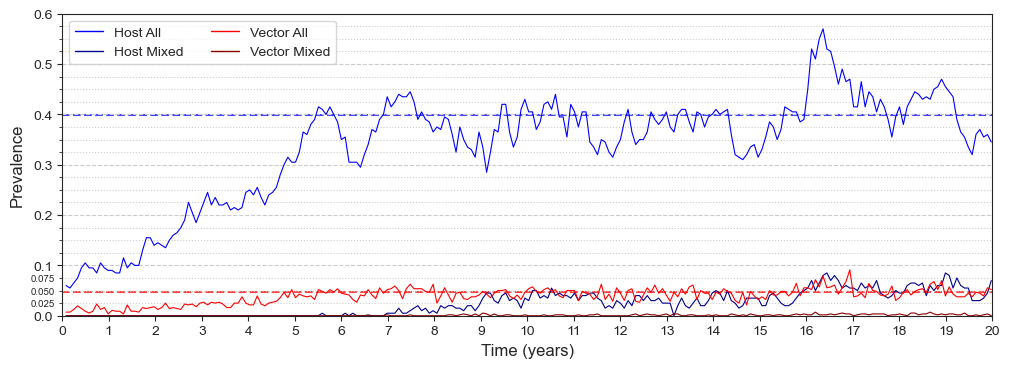

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Epochs and Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)

# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper left", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v1.pdf", bbox_inches="tight", pad_inches=0.5)

This looks like a pretty good start. Can consider adding marginals.

## Version 2

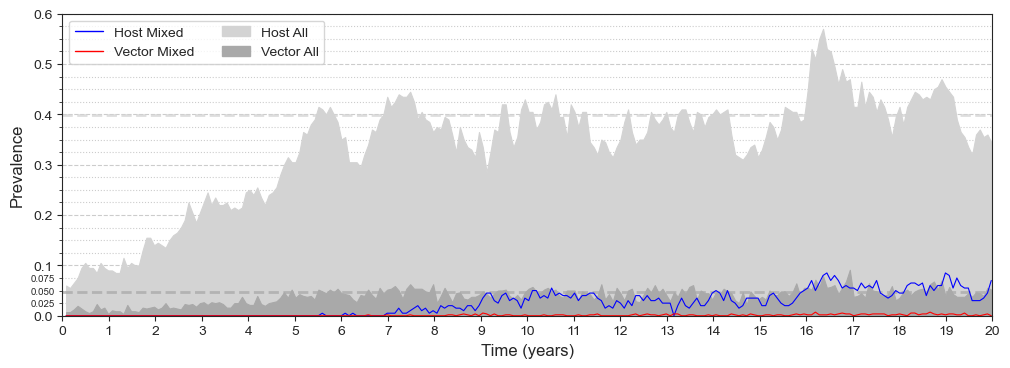

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="blue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="red", linewidth=0.8, label="Vector Mixed")

# Delineate Epochs and Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="lightgrey", 
           linestyle='dashed', linewidth=2, alpha=0.75,
           zorder=1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="darkgrey", 
           linestyle='dashed', linewidth=2, alpha=0.75,
           zorder=1)

# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper left", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v2.pdf", bbox_inches="tight", pad_inches=0.5)

## Version 3

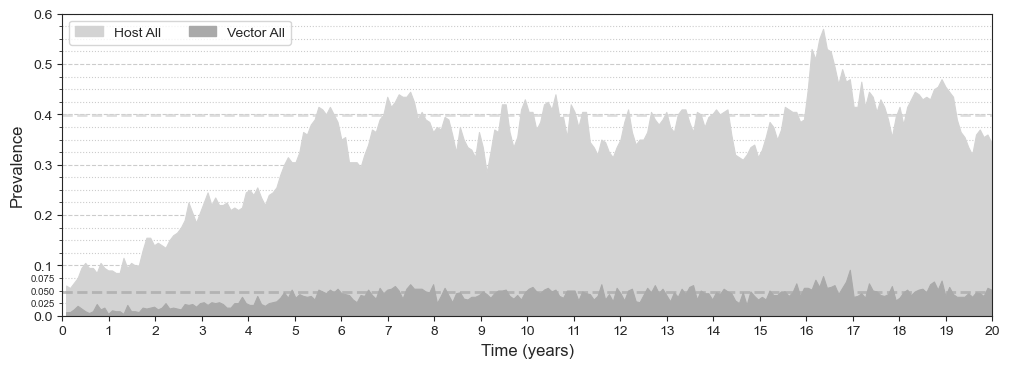

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs and Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="lightgrey", 
           linestyle='dashed', linewidth=2, alpha=0.75,
           zorder=1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="darkgrey", 
           linestyle='dashed', linewidth=2, alpha=0.75,
           zorder=1)

# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper left", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/equilibrate_prevalence_v2.pdf", bbox_inches="tight", pad_inches=0.5)

## Adding  some genetic data

In [15]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in list(ax.spines.values()):
        sp.set_visible(False)

### Version 1

In [16]:
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

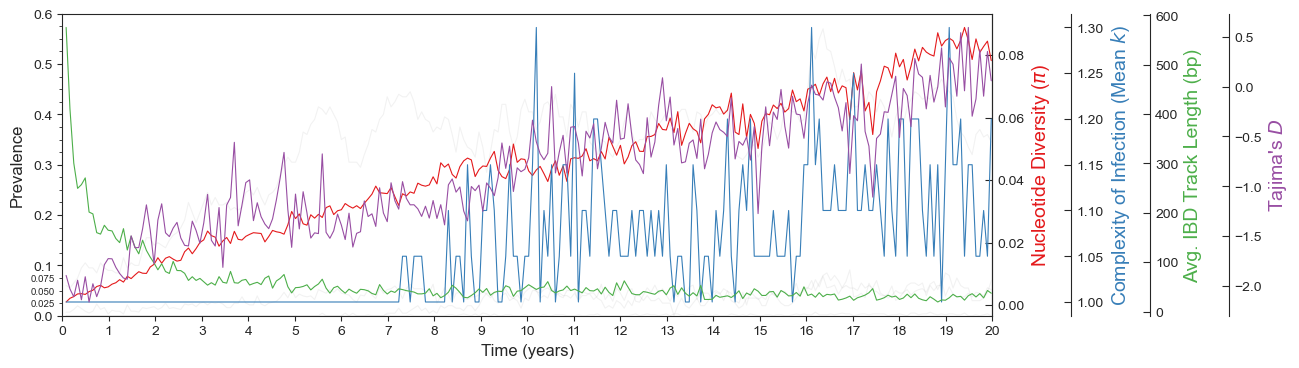

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

op_alpha = 0.1
# Host Prevalence
ax.plot(op["t0"], op["HX"], color="grey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="grey", alpha=op_alpha, linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="grey", alpha=op_alpha, linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="grey", alpha=op_alpha, linewidth=0.8, label="Vector Mixed")


# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
# ax.grid(axis="y", linestyle="dashed", zorder=-2)
# ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity Lines
for i, (metric, metric_col) in enumerate(m_dt.items()):
    
    # Twin axis
    axm = ax.twinx()
    
    # Place gapped y-axis
    axm.spines["right"].set_position(("axes", 1 + 0.085*i))
    make_patch_spines_invisible(axm)
    axm.spines["right"].set_visible(True)
    
    # Plot
    axm.plot(og["t0"], og[metric], color=metric_col, linewidth=0.8)
    axm.set_ylabel(genetic_names[metric], color=metric_col, fontsize=14)
    axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
    axm.set_xlim(time_limits)

What is even the point of hte prevalence axis if there is no prevalence shown?

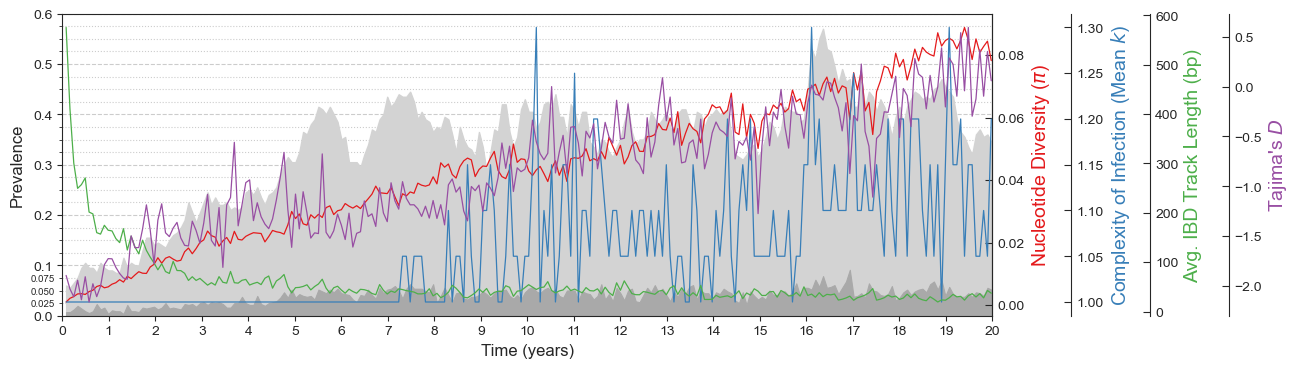

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

op_alpha = 0.1
# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity Lines
for i, (metric, metric_col) in enumerate(m_dt.items()):
    
    # Twin axis
    axm = ax.twinx()
    
    # Place gapped y-axis
    axm.spines["right"].set_position(("axes", 1 + 0.085*i))
    make_patch_spines_invisible(axm)
    axm.spines["right"].set_visible(True)
    
    # Plot
    axm.plot(og["t0"], og[metric], color=metric_col, linewidth=0.9)
    axm.set_ylabel(genetic_names[metric], color=metric_col, fontsize=14)
    axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
    axm.set_xlim(time_limits)

if savefig:
    fig.savefig("../figs/equilibrate_genetics_v2.pdf", bbox_inches="tight", pad_inches=0.5)

Version 2, showing prevalence in the back. Looks pretty good?

## Individual diversity statistics

(0.0, 7300.0)

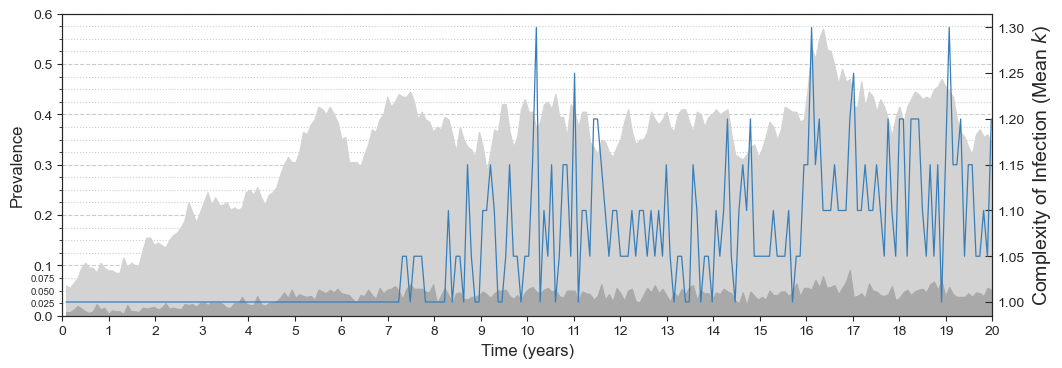

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

op_alpha = 0.1
# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity Lines
metric = "mean_k"
# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)

(0.0, 7300.0)

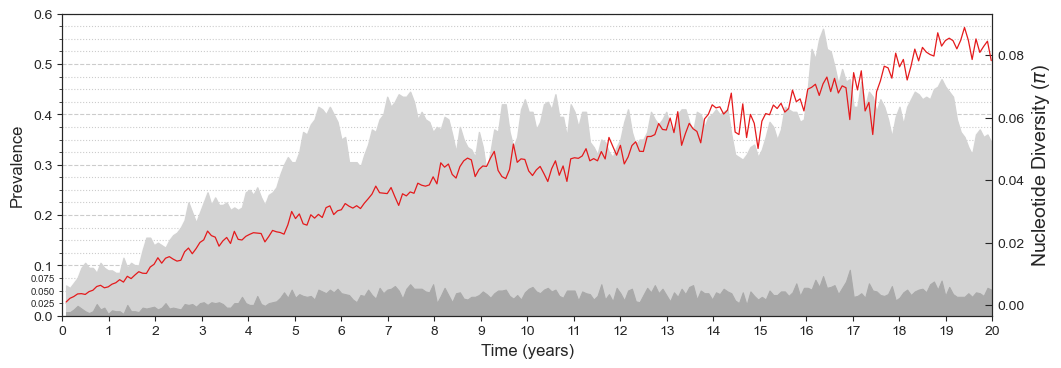

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

op_alpha = 0.1
# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
time_limits = None
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 1

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity Lines
metric = "pi"
# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)

## Plot only prevalence, with marginal

In [19]:
col_dt = {
    "HX": "blue",
    "HmX": "darkblue",
    "VX": "red",
    "VmX": "darkred"
}

In [20]:
def format_xaxis(value, tick_number,
                 days_per_year=days_per_year,
                 years_per_major_tick=years_per_major_tick):
    """
    Plot as Decade Number as opposed to Day Number
    """
    return int(round(value / (days_per_year * years_per_major_tick)))

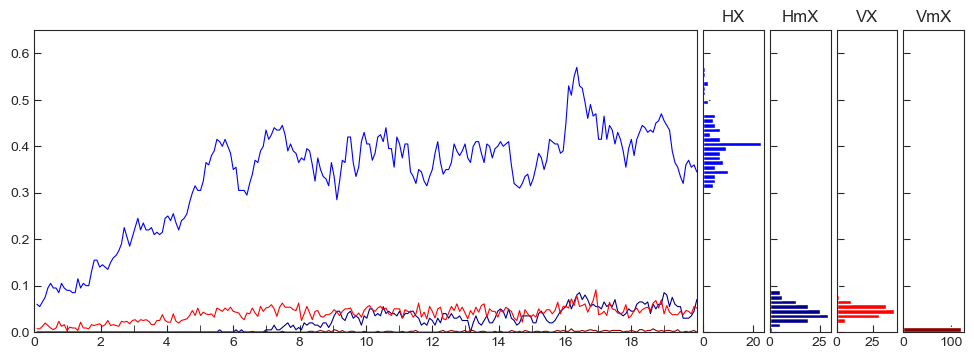

In [21]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Prepare grid
l = 14
b = l - 4
gs = gridspec.GridSpec(1, l)
ax = plt.subplot(gs[:b])
axms = [plt.subplot(gs[(b+i):(b+i+1)], sharey=ax) for i in np.arange(4)]

# Plot prevalence through time
# Host
ax.plot(op["t0"], op["HX"], color=col_dt["HX"], linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color=col_dt["HmX"], linewidth=0.8, label="Host Mixed")
# Vector
ax.plot(op["t0"], op["VX"], color=col_dt["VX"], linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color=col_dt["VmX"], linewidth=0.8, label="Vector Mixed")

# Limits
ax.set_ylim((0, 0.65))
ax.set_xlim((0, op["t0"].max()))

# Ticks
days_per_year = 365
years_per_major_tick = 2
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(round(v / days_per_year))))


ax.tick_params(axis='both', which='major', direction='in', length=5)
ax.tick_params(axis='both', which='minor', direction='in', length=5)


# Plot marginal distributions
for axm, (n, c) in zip(axms, col_dt.items()):
    axm.hist(op.query("t0 > 3650")[n], color=c,
             bins=np.arange(0, 0.7, 0.01),
             orientation="horizontal")
    axm.set_title(n)
    axm.tick_params(axis='both', which='major', direction='in', length=5)
    p = plt.setp(axm.get_yticklabels(), visible=False)

OK, finally this is starting to look decent

In [22]:
g_col_dt = {
    "mean_k": "orange",
    "pi": "pink",
    "avg_l_ibd": "green",
    "tajd": "grey"
}

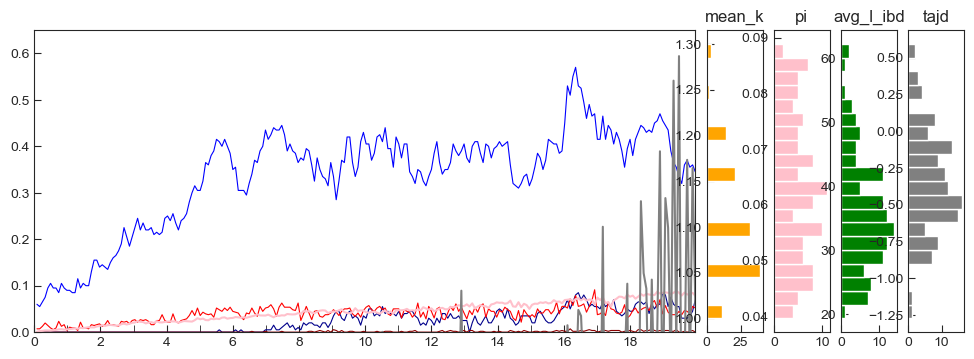

In [23]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(hspace=0.1, wspace=0.2)

# Prepare grid
l = 14
b = l - 4
gs = gridspec.GridSpec(1, l)
ax = plt.subplot(gs[:b])
axms = [plt.subplot(gs[(b+i):(b+i+1)]) for i in np.arange(4)]

# Plot prevalence through time
# Host
ax.plot(op["t0"], op["HX"], color=col_dt["HX"], linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color=col_dt["HmX"], linewidth=0.8, label="Host Mixed")
# Vector
ax.plot(op["t0"], op["VX"], color=col_dt["VX"], linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color=col_dt["VmX"], linewidth=0.8, label="Vector Mixed")


# Genetics
for n, c in g_col_dt.items():
    ax.plot(og["t0"], og[n], color=g_col_dt[n])


# Limits
ax.set_ylim((0, 0.65))
ax.set_xlim((0, op["t0"].max()))

# Ticks
days_per_year = 365
years_per_major_tick = 2
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(round(v / days_per_year))))


ax.tick_params(axis='both', which='major', direction='in', length=5)
ax.tick_params(axis='both', which='minor', direction='in', length=5)


# Plot marginal distributions
for axm, (n, c) in zip(axms, g_col_dt.items()):
    axm.hist(og.query("t0 > 3650")[n], color=c,
             bins=20,
             orientation="horizontal")
    axm.set_title(n)
    axm.tick_params(axis='both', which='major', direction='in', length=5)

Okay, so mariginal distributions are not going to look nice, let's just go with the multi-axis approach.